In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import sys
sys.path.append('sim_code/')


#for nice plots
fig_width_pt=347.5
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/(2.0)    # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inlw=2ches
fig_height = fig_width*golden_mean      # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{siunitx}"]
params = {#'backend': 'pdf',\n",
            'text.usetex': True,
            'font.weight': 'bold',
            'axes.linewidth' : 1.5,
            'axes.labelsize': 18,
            'font.size': 18,
            'legend.fontsize': 16,
            'xtick.labelsize': 18,
            'ytick.direction':'in',
            'xtick.direction':'in',
            'ytick.labelsize': 18,
            'font.family' : 'lmodern',
            #'text.latex.unicode': True,
            'figure.figsize': fig_size}
plt.rcParams.update(params)



/home/hendrykn123/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/hendrykn123/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (
<ipython-input-1-822ccbd2b1aa>:17: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{siunitx}"]


This notebook includes example codes for GLE simulations (Markovian embedding) for different shapes of memory kernel and potential of mean force (free energy). See the references for detailled information.

### Single-Exponential Memory Kernel, Double-Well Potential

Reference: https://pubs.aip.org/aip/jcp/article/148/1/014903/195735

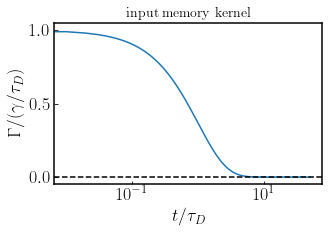

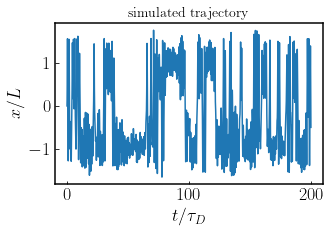

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


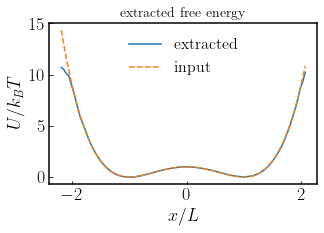

In [2]:
from gle_single_exp import *

def exp_kernel(t,tau,gamma):
    return gamma/tau*np.exp(-t/tau)

nsteps=int(1e7)
 
kT=2.494
tau_D = 1
L = 1
gamma=tau_D*kT/L**2 
U0=1*kT
tau = tau_D #memory time
dt=tau_D/100
k = gamma/tau
tau_m = tau_D/10
m = tau_m*gamma

plt.plot(np.arange(0,tau_D*50,dt),exp_kernel(np.arange(0,tau_D*50,dt),tau,gamma)/(gamma/tau_D))
plt.title('input memory kernel',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$\Gamma/(\gamma/\tau_D)$')
plt.xscale('log')
plt.axhline(y=0,color='k',linestyle='--')
plt.show()

x0=0
v0=np.random.normal(0.0,math.sqrt(kT/m))
y0=np.random.normal(x0,math.sqrt(kT/gamma))

x,vv,yy=integrate_sing_exp_dw(nsteps=nsteps, dt=dt, k=k, m=m, gamma=gamma,
U0=U0, x0=x0, v0=v0, y0=y0, kT=kT)


start = 0
end = int(len(x)*1)

x = x[start:end] #equilibrium time
t = np.arange(0,len(x)*dt,dt)


plt.plot(t[:20000],x[:20000])
plt.title('simulated trajectory',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$x/L$')
plt.show()



hist,edges=np.histogram(x, bins=100, density=True)
pos=(edges[1:]+edges[:-1])/2

fe=-kT*np.log(hist); fe-=np.min(fe)

x2 = np.linspace(np.min(pos), np.max(pos), 100)
energy_real = U0 * ((x2)**2 - 1)**2


plt.plot(pos,fe/kT,label = 'extracted')
plt.plot(x2,energy_real/kT,'--', label = 'input')
plt.legend(loc='best',frameon = False)
plt.title('extracted free energy',fontsize=14)
plt.xlabel('$x/L$')
plt.ylabel('$U/k_BT$')
plt.show()

### Single-Exponential Memory Kernel, Harmonic Potential

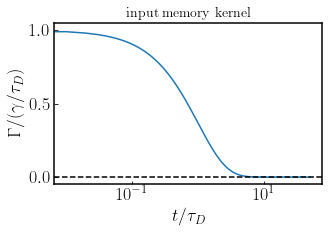

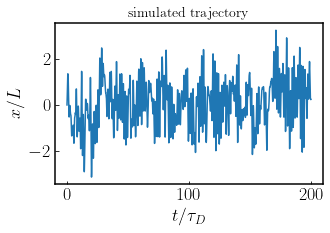

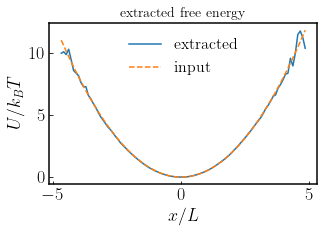

In [3]:
from gle_single_exp import *

def exp_kernel(t,tau,gamma):
    return gamma/tau*np.exp(-t/tau)

nsteps=int(1e7)
 
kT=2.494
tau_D = 1
dt=tau_D/100
L = 1
gamma=tau_D*kT/L**2 
k0=kT/L**2
tau = tau_D #memory time
k = gamma/tau
tau_m = tau_D/10
m = tau_m*gamma

plt.plot(np.arange(0,tau_D*50,dt),exp_kernel(np.arange(0,tau_D*50,dt),tau,gamma)/(gamma/tau_D))
plt.title('input memory kernel',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$\Gamma/(\gamma/\tau_D)$')
plt.xscale('log')
plt.axhline(y=0,color='k',linestyle='--')
plt.show()

x0=0
v0=np.random.normal(0.0,math.sqrt(kT/m))
y0=np.random.normal(x0,math.sqrt(kT/gamma))

x,vv,yy=integrate_sing_exp_harm(nsteps=nsteps, dt=dt, k=k, m=m, gamma=gamma,
k0=k0, x0=x0, v0=v0, y0=y0, kT=kT)


start = 0
end = int(len(x)*1)

x = x[start:end] #equilibrium time
t = np.arange(0,len(x)*dt,dt)


plt.plot(t[:20000],x[:20000])
plt.title('simulated trajectory',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$x/L$')
plt.show()



hist,edges=np.histogram(x, bins=100, density=True)
pos=(edges[1:]+edges[:-1])/2

fe=-kT*np.log(hist); fe-=np.min(fe)

x2 = np.linspace(np.min(pos), np.max(pos), 100)
energy_real = k0/2*x2**2


plt.plot(pos,fe/kT,label = 'extracted')
plt.plot(x2,energy_real/kT,'--', label = 'input')
plt.legend(loc='best',frameon = False)
plt.title('extracted free energy',fontsize=14)
plt.xlabel('$x/L$')
plt.ylabel('$U/k_BT$')
plt.show()

### Langevin Simulation (memory-less), Double-Well Potential

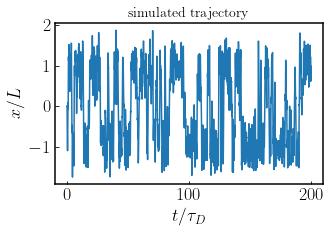

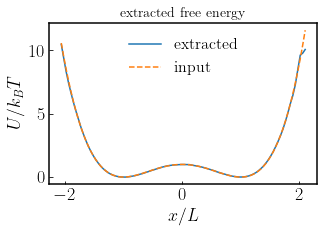

In [4]:
from langevin_sim import *

nsteps=int(1e7)
 
kT=2.494
tau_D = 1
L = 1
gamma=tau_D*kT/L**2 
U0=1*kT
dt=tau_D/100
tau_m = tau_D/10

m = tau_m*gamma


x0=0
v0=np.random.normal(0.0,math.sqrt(kT/m))

x,vv=integrate_langevin_dw(nsteps=nsteps, dt=dt, m=m, gamma=gamma,
U0=U0, x0=x0, v0=v0, kT=kT)


start = 0
end = int(len(x)*1)

x = x[start:end] #equilibrium time
t = np.arange(0,len(x)*dt,dt)


plt.plot(t[:20000],x[:20000])
plt.title('simulated trajectory',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$x/L$')
plt.show()



hist,edges=np.histogram(x, bins=100, density=True)
pos=(edges[1:]+edges[:-1])/2

fe=-kT*np.log(hist); fe-=np.min(fe)

x2 = np.linspace(np.min(pos), np.max(pos), 100)
energy_real = U0 * ((x2)**2 - 1)**2


plt.plot(pos,fe/kT,label = 'extracted')
plt.plot(x2,energy_real/kT,'--', label = 'input')
plt.legend(loc='best',frameon = False)
plt.title('extracted free energy',fontsize=14)
plt.xlabel('$x/L$')
plt.ylabel('$U/k_BT$')
plt.show()

### Oscillatory-Exponential Memory Kernel, Double-Well Potential

Reference: https://pubs.acs.org/doi/full/10.1021/acs.jpcb.1c09481

1 0.16120978476741468 6.283185307179586 2.494 0.24645232176581186 0.24940000000000004 0.12322616088290593


/home/hendrykn123/.local/lib/python3.9/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


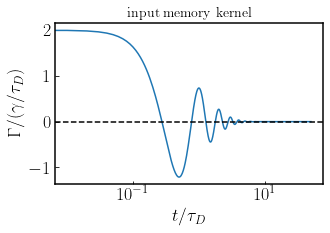

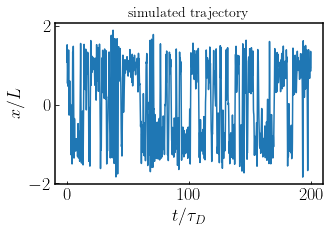

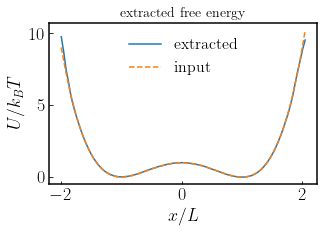

In [5]:
from gle_exp_osc import *

def exp_osc_kernel(t,tau,k,omega):
    return k*np.exp(-t/(tau))*(np.cos(omega*t) + 1/(tau*omega)*np.sin(omega*t))

nsteps=int(1e7)
 
kT=2.494
tau_D = 1
L = 1
dt=tau_D/100

gamma = kT*tau_D/L**2
tau = tau_D
k = gamma/tau*2
tau_m = tau_D/10
m = tau_m*gamma

omega = 2*np.pi/tau
tau_w = 1/np.sqrt((omega**2-(1/tau)**2))
my = k/(tau**-2 + omega**2)
gammay = 2*my/tau
print(tau,tau_w,omega,gamma,gammay, m ,my)

plt.plot(np.arange(0,tau_D*50,dt),exp_osc_kernel(np.arange(0,tau_D*50,dt),tau,k,omega)/(gamma/tau_D))
plt.title('input memory kernel',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$\Gamma/(\gamma/\tau_D)$')
plt.xscale('log')
plt.axhline(y=0,color='k',linestyle='--')
plt.show()

v0=np.random.normal(0.0,math.sqrt(kT/m))
w0=np.random.normal(0.0,math.sqrt(kT/my))
y0=np.random.normal(x0,math.sqrt(kT*gamma))

x,vv,yy,ww=integrate_exp_osc(nsteps, dt, m, k, my, gammay, x0, y0, v0,w0, kT,U0)

start = 100
end = int(len(x)*1)

x = x[start:end] #equilibrium time
t = np.arange(0,len(x)*dt,dt)


plt.plot(t[:20000],x[:20000])
plt.title('simulated trajectory',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$x/L$')
plt.show()



hist,edges=np.histogram(x, bins=100, density=True)
pos=(edges[1:]+edges[:-1])/2

fe=-kT*np.log(hist); fe-=np.min(fe)

x2 = np.linspace(np.min(pos), np.max(pos), 100)
energy_real = U0 * ((x2)**2 - 1)**2


plt.plot(pos,fe/kT,label = 'extracted')
plt.plot(x2,energy_real/kT,'--', label = 'input')
plt.legend(loc='best',frameon = False)
plt.title('extracted free energy',fontsize=14)
plt.xlabel('$x/L$')
plt.ylabel('$U/k_BT$')
plt.show()

### Multi-Exponential Memory Kernel, Double-Well Potential

Reference: https://www.pnas.org/doi/abs/10.1073/pnas.2023856118

2.494


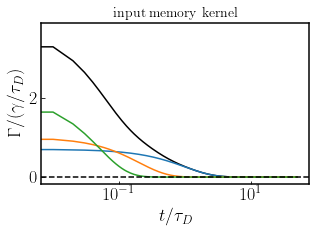

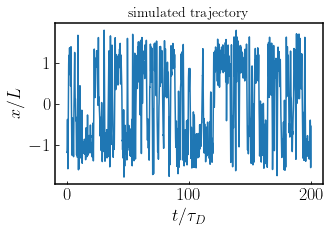

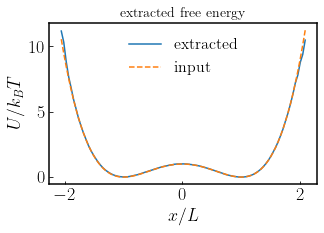

In [6]:
from gle_multi_exp import *


def multi_exp_kernel(t,gammas,taus):
    func = np.zeros(len(t))
    for i in range(0,len(gammas)):
        func+= gammas[i]/taus[i]*np.exp(-t/taus[i])
        
    return func

nsteps=int(1e7)
 
kT=2.494
tau_D = 1
L = 1
dt=tau_D/100
U0=kT

gamma = kT*tau_D/L**2
tau = tau_D
k = gamma/tau*2
tau_m = tau_D/10
m = tau_m*gamma

gammas = np.array([0.7*gamma,0.2*gamma,0.1*gamma])
taus = np.array([tau,0.2*tau,0.05*tau])
    
n_exp = len(gammas)
print(np.sum(gammas))

plt.plot(np.arange(0,tau_D*50,dt),multi_exp_kernel(np.arange(0,tau_D*50,dt),gammas,taus)/(gamma/tau_D),color='k')
plt.plot(np.arange(0,tau_D*50,dt),exp_kernel(np.arange(0,tau_D*50,dt),taus[0],gammas[0])/(gamma/tau_D))
plt.plot(np.arange(0,tau_D*50,dt),exp_kernel(np.arange(0,tau_D*50,dt),taus[1],gammas[1])/(gamma/tau_D))
plt.plot(np.arange(0,tau_D*50,dt),exp_kernel(np.arange(0,tau_D*50,dt),taus[2],gammas[2])/(gamma/tau_D))

plt.title('input memory kernel',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$\Gamma/(\gamma/\tau_D)$')
plt.xscale('log')
plt.axhline(y=0,color='k',linestyle='--')
plt.show()

x0=0
v0=np.random.normal(0.0,math.sqrt(kT/m))
y0=np.zeros(n_exp)

for j in range(n_exp):
    y0[j]=np.random.normal(x0,math.sqrt(kT*np.absolute(taus[j]/gammas[j])))


x,vv,yy = integrate_gle_multi_exp(nsteps, dt, m, gammas, taus,x0, y0, v0, kT,U0)


start = 100
end = int(len(x)*1)

x = x[start:end] #equilibrium time
t = np.arange(0,len(x)*dt,dt)


plt.plot(t[:20000],x[:20000])
plt.title('simulated trajectory',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$x/L$')
plt.show()



hist,edges=np.histogram(x, bins=100, density=True)
pos=(edges[1:]+edges[:-1])/2

fe=-kT*np.log(hist); fe-=np.min(fe)

x2 = np.linspace(np.min(pos), np.max(pos), 100)
energy_real = U0 * ((x2)**2 - 1)**2


plt.plot(pos,fe/kT,label = 'extracted')
plt.plot(x2,energy_real/kT,'--', label = 'input')
plt.legend(loc='best',frameon = False)
plt.title('extracted free energy',fontsize=14)
plt.xlabel('$x/L$')
plt.ylabel('$U/k_BT$')
plt.show()

### Multi-Exponential Memory Kernel, Arbitrary Potential

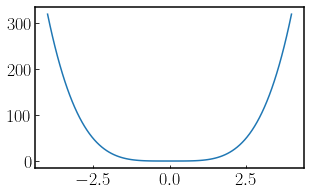

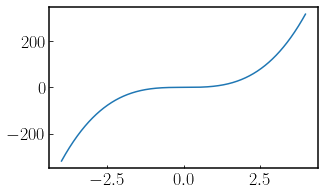

In [7]:
from gle_multi_exp import *


pos = np.linspace(-4, 4, 100)
k0 = kT/L**2
fe = k0/2*pos**4
plt.plot(pos,fe)
plt.show()

fe_spline,force_bins,force_matrix = spline_fe_for_sim(pos,fe)
plt.plot(force_bins,force_matrix)


2.494


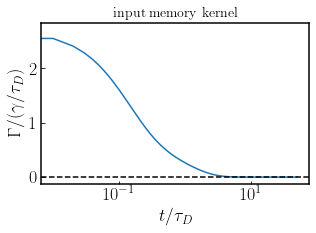

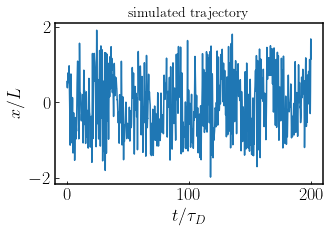

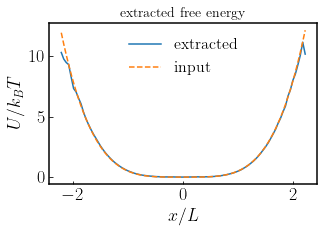

In [8]:
from gle_multi_exp import *


def multi_exp_kernel(t,gammas,taus):
    func = np.zeros(len(t))
    for i in range(0,len(gammas)):
        func+= gammas[i]/taus[i]*np.exp(-t/taus[i])
        
    return func

nsteps=int(1e7)
 
kT=2.494
tau_D = 1
L = 1
dt=tau_D/100

pos = np.linspace(-4, 4, 100)
k0 = kT/L**2
fe = k0/2*pos**4
fe_spline,force_bins,force_matrix = spline_fe_for_sim(pos,fe)

gamma = kT*tau_D/L**2
tau = tau_D
k = gamma/tau*2
tau_m = tau_D/10
m = tau_m*gamma

gammas = np.array([0.7*gamma,0.2*gamma,0.1*gamma])
taus = np.array([tau,0.2*tau,0.1*tau])
    
n_exp = len(gammas)
print(np.sum(gammas))

plt.plot(np.arange(0,tau_D*50,dt),multi_exp_kernel(np.arange(0,tau_D*50,dt),gammas,taus)/(gamma/tau_D))
plt.title('input memory kernel',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$\Gamma/(\gamma/\tau_D)$')
plt.xscale('log')
plt.axhline(y=0,color='k',linestyle='--')
plt.show()

x0=0
v0=np.random.normal(0.0,math.sqrt(kT/m))
y0=np.zeros(n_exp)

for j in range(n_exp):
    y0[j]=np.random.normal(x0,math.sqrt(kT*np.absolute(taus[j]/gammas[j])))


x,vv,yy = integrate_gle_multi_exp_arb_pot(nsteps, dt, m, gammas, taus,x0, y0, v0, kT,force_bins,force_matrix)


start = 100
end = int(len(x)*1)

x = x[start:end] #equilibrium time
t = np.arange(0,len(x)*dt,dt)


plt.plot(t[:20000],x[:20000])
plt.title('simulated trajectory',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$x/L$')
plt.show()



hist,edges=np.histogram(x, bins=100, density=True)
pos=(edges[1:]+edges[:-1])/2

fe=-kT*np.log(hist); fe-=np.min(fe)

x2 = np.linspace(np.min(pos), np.max(pos), 100)
energy_real = k0/2*x2**4


plt.plot(pos,fe/kT,label = 'extracted')
plt.plot(x2,energy_real/kT,'--', label = 'input')
plt.legend(loc='best',frameon = False)
plt.title('extracted free energy',fontsize=14)
plt.xlabel('$x/L$')
plt.ylabel('$U/k_BT$')
plt.show()

### Non-Equilibrium GLE
Use a different random force-correlator

Reference: https://iopscience.iop.org/article/10.1209/0295-5075/ac85d6/meta

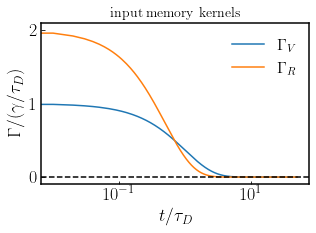

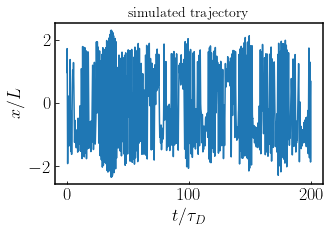

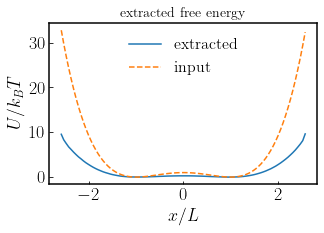

In [9]:
from gle_single_exp_noneq import *

def exp_kernel(t,tau,gamma):
    return gamma/tau*np.exp(-t/tau)

nsteps=int(1e7)
 
kT=2.494
tauD = 1
L = 1
gamma=tauD*kT/L**2
U0=1*kT
tauR = tauD/2
tauv = tauD#memory time

dt=tauD/100
taum = tauD/10
m = taum*gamma


plt.plot(np.arange(0,tau_D*50,dt),exp_kernel(np.arange(0,tau_D*50,dt),tauv,gamma)/(gamma/tau_D),label=r'$\Gamma_V$')
plt.plot(np.arange(0,tau_D*50,dt),exp_kernel(np.arange(0,tau_D*50,dt),tauR,gamma)/(gamma/tau_D),label=r'$\Gamma_R$')
plt.title('input memory kernels',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$\Gamma/(\gamma/\tau_D)$')
plt.xscale('log')
plt.axhline(y=0,color='k',linestyle='--')
plt.legend(frameon=False)
plt.show()

x0=0
v0=np.random.normal(0.0,math.sqrt(kT/m))
yR0=np.random.normal(x0,math.sqrt(kT/gamma))
yv0=np.random.normal(x0,math.sqrt(kT/gamma))

x,vv,yvy,yRy=integrate_sing_exp_noneq(nsteps=nsteps, dt=dt,
                         tauD=tauD,taum=taum,tauv=tauv, tauR=tauR, x0=x0, v0=x0, yv0=yv0,yR0=yR0, kT=2.494,U0=U0)

start = 100
end = int(len(x)*1)

x = x[start:end] #equilibrium time
t = np.arange(0,len(x)*dt,dt)


plt.plot(t[:20000],x[:20000])
plt.title('simulated trajectory',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$x/L$')
plt.show()



hist,edges=np.histogram(x, bins=100, density=True)
pos=(edges[1:]+edges[:-1])/2

fe=-kT*np.log(hist); fe-=np.min(fe)

x2 = np.linspace(np.min(pos), np.max(pos), 100)
energy_real = U0 * ((x2)**2 - 1)**2

plt.plot(pos,fe/kT,label = 'extracted')
plt.plot(x2,energy_real/kT,'--', label = 'input')
plt.legend(loc='best',frameon = False)
plt.title('extracted free energy',fontsize=14)
plt.xlabel('$x/L$')
plt.ylabel('$U/k_BT$')
plt.show()


#### note that the extracted free energy can't match the input in non-equilibrium!
